In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

from functions.linear_models import PCA_function, OLS_regression
from functions.number_PC import rule_thumb, informal_way, biggest_drop

In [2]:
# hide warning messages
import warnings
warnings.filterwarnings("ignore")

In [3]:
# better plots
sns.set(rc={'figure.figsize':(12,8)});

In [4]:
directory = os.path.dirname(os.getcwd())
directory

'd:\\github\\AssignmentEconometricsIV'

## Question

The first question consists of a factor analysis of a large dataset. We consider monthly close-to-
close excess returns from a cross-section of 9,456 firms traded in the New York Stock Exchange.
The data starts on November 1991 and runs until December 2018. There are 326 monthly
observations in total. 

In addition to the returns we also consider 16 monthly factors: 

- Market (MKT)
- Small-minus-Big (SMB)
- High-minus-Low (HML)
- Conservative-minus-Aggressive (CMA)
- Robust-minus-Weak (RMW)
- earning/price ratio (EP)
- cash-flow/price ratio (CFP)
- dividend/price ratio
- accruals (ACC)
- market beta (BETA)
- net share issues 
- daily variance (RETVOL)
- daily idiosyncratic variance (IDIOVOL)
- 1-month momentum (MOM1)
- 36-month momentum (MOM36)

The dataset is organized as an excel file named `returns.xlsx`.

In [5]:
input_path = f'{directory}\\data\\returns.xlsx'
df = pd.read_excel(input_path, index_col=0)

In [6]:
df.head()

,MKT,HML,SMB,MOM1,MOM36,ACC,BETA,CFP,CHCSHO,DY,...,r_9447,r_9448,r_9449,r_9450,r_9451,r_9452,r_9453,r_9454,r_9455,r_9456
dates,,,,,,,,,,,,,,,,,,,,,
1991-11-29,-0.041264,-0.028083,0.004779,-0.007336,-0.025496,-0.013692,0.035433,-0.015116,-0.006771,-0.001226,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1991-12-31,0.107984,-0.022529,-0.027366,0.010963,-0.021188,-0.027887,-0.082499,-0.032122,-0.005893,-0.037563,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-01-31,-0.007668,0.051012,0.085547,0.050916,0.108588,0.021978,-0.072801,0.028117,-0.008193,-0.014228,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-02-28,0.010796,0.070501,0.002794,-0.027398,0.079286,0.003860,-0.024906,0.037363,0.015625,0.022895,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-03-31,-0.025367,0.039029,-0.015135,-0.009367,0.024631,0.004612,0.041266,0.037916,0.017117,0.046819,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
factors_name = df.columns[:16]
factors_name

Index(['MKT', 'HML', 'SMB', 'MOM1', 'MOM36', 'ACC', 'BETA', 'CFP', 'CHCSHO',
       'DY', 'EP', 'IDIOVOL', 'CMA', 'UMD', 'RMW', 'RETVOL'],
      dtype='object')

In [8]:
factors = df[factors_name]
factors.head()

,MKT,HML,SMB,MOM1,MOM36,ACC,BETA,CFP,CHCSHO,DY,EP,IDIOVOL,CMA,UMD,RMW,RETVOL
dates,,,,,,,,,,,,,,,,
1991-11-29,-0.041264,-0.028083,0.004779,-0.007336,-0.025496,-0.013692,0.035433,-0.015116,-0.006771,-0.001226,0.001586,0.036246,-0.014193,0.012468,-0.005361,0.026900
1991-12-31,0.107984,-0.022529,-0.027366,0.010963,-0.021188,-0.027887,-0.082499,-0.032122,-0.005893,-0.037563,-0.008621,-0.042074,-0.003394,0.079571,0.032935,-0.029811
1992-01-31,-0.007668,0.051012,0.085547,0.050916,0.108588,0.021978,-0.072801,0.028117,-0.008193,-0.014228,-0.006754,-0.089817,0.019346,-0.026594,0.005965,-0.076449
1992-02-28,0.010796,0.070501,0.002794,-0.027398,0.079286,0.003860,-0.024906,0.037363,0.015625,0.022895,0.016494,-0.012679,0.022658,-0.005968,0.017131,-0.021424
1992-03-31,-0.025367,0.039029,-0.015135,-0.009367,0.024631,0.004612,0.041266,0.037916,0.017117,0.046819,0.032956,0.060565,0.025606,-0.003624,-0.013689,0.027512


In [9]:
returns_name = df.columns[16:]
returns_name

Index(['r_   1', 'r_   2', 'r_   3', 'r_   4', 'r_   5', 'r_   6', 'r_   7',
       'r_   8', 'r_   9', 'r_  10',
       ...
       'r_9447', 'r_9448', 'r_9449', 'r_9450', 'r_9451', 'r_9452', 'r_9453',
       'r_9454', 'r_9455', 'r_9456'],
      dtype='object', length=9456)

In [10]:
returns = df[returns_name]
returns.head()

,r_ 1,r_ 2,r_ 3,r_ 4,r_ 5,r_ 6,r_ 7,r_ 8,r_ 9,r_ 10,...,r_9447,r_9448,r_9449,r_9450,r_9451,r_9452,r_9453,r_9454,r_9455,r_9456
dates,,,,,,,,,,,,,,,,,,,,,
1991-11-29,0.130715,-0.053900,-0.110696,-0.043900,0.218322,0.050645,0.575047,0.008921,-0.105349,-0.034203,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1991-12-31,-0.010580,-0.056432,0.213591,0.183700,1.299230,0.306545,0.040644,-0.003800,0.318781,0.178492,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-01-31,-0.055124,-0.003400,-0.164114,-0.205154,-0.082347,0.075547,-0.024677,-0.066691,0.155137,0.071490,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-02-28,-0.202800,5.219422,0.039753,-0.057745,-0.117086,0.204517,-0.089757,-0.083881,0.018253,0.128348,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1992-03-31,0.078418,-0.181971,-0.023808,0.043112,0.415955,0.064782,-0.146257,-0.179871,-0.209586,-0.173690,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
daterange = returns.index
daterange

DatetimeIndex(['1991-11-29', '1991-12-31', '1992-01-31', '1992-02-28',
               '1992-03-31', '1992-04-30', '1992-05-29', '1992-06-30',
               '1992-07-31', '1992-08-31',
               ...
               '2018-03-29', '2018-04-30', '2018-05-31', '2018-06-29',
               '2018-07-31', '2018-08-31', '2018-09-28', '2018-10-31',
               '2018-11-30', '2018-12-31'],
              dtype='datetime64[ns]', name='dates', length=326, freq=None)

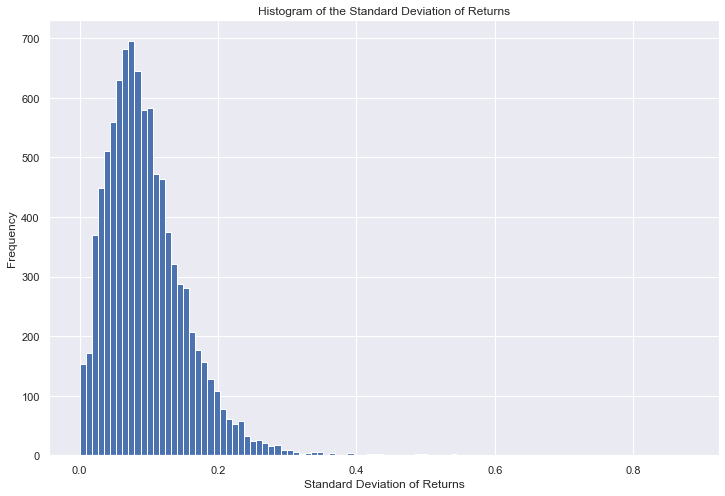

In [12]:
plt.hist(returns.std(axis=0), bins=100)
plt.xlabel('Standard Deviation of Returns')
plt.ylabel('Frequency')
plt.title('Histogram of the Standard Deviation of Returns');

In [13]:
standardized_returns = (returns - returns.mean(axis=0))/returns.std(axis=0)
standardized_returns.head()

,r_ 1,r_ 2,r_ 3,r_ 4,r_ 5,r_ 6,r_ 7,r_ 8,r_ 9,r_ 10,...,r_9447,r_9448,r_9449,r_9450,r_9451,r_9452,r_9453,r_9454,r_9455,r_9456
dates,,,,,,,,,,,,,,,,,,,,,
1991-11-29,1.483764,-0.219996,-0.914187,-0.665776,1.031984,0.207163,3.474317,-0.028135,-0.775232,-0.357849,...,-0.129987,-0.057779,-0.060114,-0.153584,0.054239,0.063002,-0.040374,0.014576,0.014591,-0.126962
1991-12-31,-0.223389,-0.226904,1.435410,2.066812,6.526489,1.869218,0.235135,-0.125593,2.076082,1.415134,...,-0.129987,-0.057779,-0.060114,-0.153584,0.054239,0.063002,-0.040374,0.014576,0.014591,-0.126962
1992-01-31,-0.761584,-0.082197,-1.301224,-2.601812,-0.496389,0.368900,-0.160796,-0.607431,0.975946,0.523187,...,-0.129987,-0.057779,-0.060114,-0.153584,0.054239,0.063002,-0.040374,0.014576,0.014591,-0.126962
1992-02-28,-2.545832,14.169328,0.175881,-0.832001,-0.672972,1.206552,-0.555266,-0.739131,0.055711,0.997142,...,-0.129987,-0.057779,-0.060114,-0.153584,0.054239,0.063002,-0.040374,0.014576,0.014591,-0.126962
1992-03-31,0.851900,-0.569465,-0.284648,0.378895,2.036596,0.298978,-0.897734,-1.474551,-1.475986,-1.520584,...,-0.129987,-0.057779,-0.060114,-0.153584,0.054239,0.063002,-0.040374,0.014576,0.014591,-0.126962


The model

$$
\begin{aligned}
Y_t & =\beta_0+\beta_1 X_{1 t}+\cdots+\beta_p X_{n t}+U_t, \quad t=1, \ldots, T \\
& =\boldsymbol{\beta}^{\prime} \boldsymbol{X}_t+U_t \\
\boldsymbol{Y} & =\boldsymbol{X} \boldsymbol{\beta}+\boldsymbol{U} \quad \text { (matrix notation). }
\end{aligned}
$$
However, $n>T$ (more columns than rows in $X$ ).


The usual ordinary least squares (OLS) solution
$$
\widehat{\boldsymbol{\beta}}=\left(X^{\prime} X\right)^{-1} X^{\prime} Y
$$
is not valid anymore.

Solution: reduce the dimension of $\boldsymbol{X}$ by postulating that:

$$
\underset{(n \times 1)}{\boldsymbol{X}_t}=\underset{(n \times k)}{\boldsymbol{\Lambda}} \underset{(k \times 1)}{\boldsymbol{F}_t}+\underset{(n \times 1)}{\boldsymbol{V}_t},
$$
where:
- $F_t$ is a set of $k<<n$ unobserved factors;
- $\boldsymbol{V}_t$ is the vector of idiosyncratic errors;
- $\boldsymbol{\Lambda}$ is the matrix of unobserved factor loadings.

### (a) (30 points) 

Compute the principal components of the returns and determine the optimal number of principal factors by one the methods described in Lecture 2. How much of the variance will the factors be able to explain?

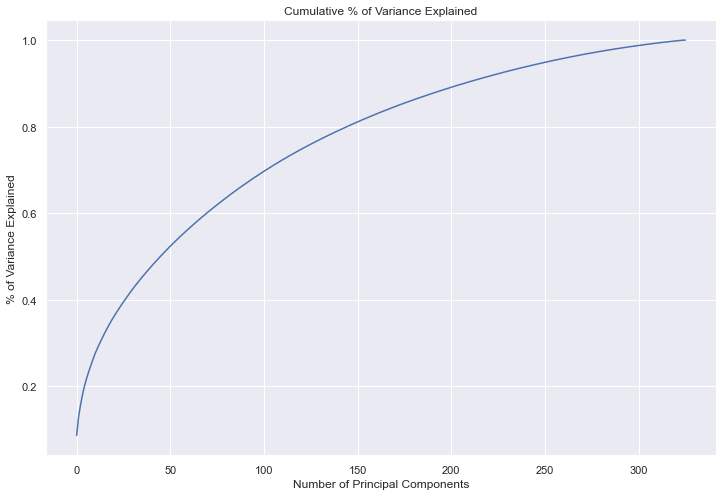

In [14]:
pcs, gammas, lambdas, alphas = PCA_function(returns)

The transformed dataset containing only the first $k$ PCs is the $(T \times k)$ matrix is given by
$$
\begin{aligned}
Z_{(k)}&:=\boldsymbol{X} \boldsymbol{\Gamma}_k \\
&:=\left(Z_1, \ldots, Z_k\right) .
\end{aligned}
$$

In [15]:
pcs

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,...,PC 317,PC 318,PC 319,PC 320,PC 321,PC 322,PC 323,PC 324,PC 325,PC 326
dates,,,,,,,,,,,,,,,,,,,,,
1991-11-29,-0.932311,0.655585,0.023695,-0.023417,-0.126589,0.216290,-0.287319,0.317324,0.367579,-0.003083,...,0.099741,-0.147412,-0.017165,0.039770,-0.030666,-0.305971,-0.070527,0.105582,-0.107813,4.735418e-16
1991-12-31,0.684426,-0.766075,0.098573,0.101246,0.403129,-0.197598,0.258110,-0.600949,-0.532293,-0.198487,...,-0.056220,-0.052040,0.049895,-0.116038,-0.000257,-0.216104,-0.019173,0.044938,0.046535,4.735418e-16
1992-01-31,2.223682,-0.458117,-0.226293,-0.012401,0.090334,-0.388412,0.722587,-1.958945,-1.086762,-0.027658,...,0.012034,-0.102328,0.015964,0.057844,-0.015542,-0.043326,-0.015525,0.020216,0.011105,4.735418e-16
1992-02-28,0.562873,-0.140579,0.159400,0.006865,0.158465,-0.255173,0.436401,-0.784899,-0.009006,-0.100874,...,-0.081432,-0.110698,-0.007424,0.027146,-0.009137,0.126851,0.036233,-0.057103,0.000894,4.735418e-16
1992-03-31,-0.743650,0.306019,0.224420,-0.089483,-0.141921,0.050060,-0.242078,0.170550,0.233088,0.004558,...,-0.017391,-0.038388,-0.117780,0.005034,-0.062418,-0.106408,-0.033974,-0.035663,-0.002988,4.735418e-16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31,0.161871,-0.265360,-0.020674,-0.097998,0.026575,-0.056679,-0.109673,-0.051071,0.165194,-0.118351,...,-0.029515,0.187625,-0.124839,0.082496,-0.793752,0.239586,-0.181260,0.009889,-0.084397,4.735418e-16
2018-09-28,-0.942054,0.462936,0.124402,-0.082200,-0.051525,0.076335,-0.044931,0.278179,0.381509,0.355261,...,-0.229286,-0.734919,0.049653,-0.526654,0.340547,-0.242943,0.018376,-0.267907,0.114492,4.735418e-16
2018-10-31,-2.535630,2.642636,-0.063295,0.056235,0.753975,0.545761,-0.142676,-0.170747,0.015823,-0.070887,...,-0.562181,-0.490485,-0.060676,-0.242340,1.202036,-0.721417,0.795699,0.831066,0.851113,4.735418e-16


Given the desired number of $\mathrm{PCs}$, say $1 \leq k \leq n$, we collect all the vectors $\gamma_1, \ldots \gamma_k$ in a $(n \times k)$ matrix
$$
\Gamma_k:=\left(\gamma_1, \ldots \gamma_k\right)
$$

In [16]:
gammas.shape

(326, 9456)

Also, by construction, the columns of $Z_{(k)}$ (the PCs) are orthogonal random variables, and with sample variances $\lambda_1, \ldots, \lambda_k$.

Thus, the sample covariance matrix of $Z_{(k)}$ is given by the $(k \times k)$ diagonal matrix
$$
\boldsymbol{\Lambda}_k:=\operatorname{diag}\left(\lambda_1, \ldots, \lambda_k\right)
$$

In [17]:
lambdas[:10]

array([10.59291481,  5.04991983,  3.33383555,  2.76500035,  2.40685564,
        1.94349613,  1.7572486 ,  1.61955915,  1.51600711,  1.45686289])

It is a good idea to start by running a full PCA $(k=n)$ and plotting the quantity
$$
\alpha_j=\frac{\lambda_j}{\sum_{j=1}^n \lambda_j} 
$$
for $j \in\{1, \ldots, n\}$.

In [18]:
alphas[:10]

array([0.0868341 , 0.04139609, 0.0273287 , 0.02266575, 0.0197299 ,
       0.01593157, 0.01440483, 0.01327614, 0.01242728, 0.01194245])

In [19]:
Lambda = round(pcs.cov(), 2)

Also, by construction, the columns of $Z_{(k)}$ (the $\mathrm{PCs}$) are orthogonal random variables, and with sample variances $\lambda_1, \ldots, \lambda_k$.
Thus, the sample covariance matrix of $Z_{(k)}$ is given by the $(k \times k)$ diagonal matrix
$$
\boldsymbol{\Lambda}_k:=\operatorname{diag}\left(\lambda_1, \ldots, \lambda_k\right) .
$$

In [20]:
Lambda.head(10)[['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10']]

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
PC 1,10.59,0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00
PC 2,0.00,5.05,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,0.00
PC 3,0.00,-0.00,3.33,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00
PC 4,0.00,-0.00,0.00,2.77,0.00,0.00,-0.00,0.00,-0.00,0.00
PC 5,0.00,0.00,-0.00,0.00,2.41,-0.00,0.00,0.00,0.00,0.00
PC 6,0.00,-0.00,0.00,0.00,-0.00,1.94,0.00,0.00,-0.00,-0.00
PC 7,-0.00,0.00,0.00,-0.00,0.00,0.00,1.76,0.00,0.00,0.00
PC 8,-0.00,-0.00,-0.00,0.00,0.00,0.00,0.00,1.62,-0.00,-0.00
PC 9,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,1.52,-0.00
PC 10,0.00,0.00,0.00,0.00,0.00,-0.00,0.00,-0.00,-0.00,1.46


In [21]:
lambdas[:10]

array([10.59291481,  5.04991983,  3.33383555,  2.76500035,  2.40685564,
        1.94349613,  1.7572486 ,  1.61955915,  1.51600711,  1.45686289])

#### Rule of Thumb
Stop at a $k$ such that the $(k+1)$-th PC does not add much to the already explained variance (say $<3 \%$ ).

In [22]:
n_pc_rt = rule_thumb(alphas)

The first 2 PCs explain 12.82% of the returns variance.


#### Informal Way
Choose the number of components such that a large portion (say 90\%) of the variance is explained.

In [23]:
n_pc_iw = informal_way(alphas)

The first 207 PCs explain 89.91% of the returns variance.


#### Biggest Drop 

Onatski (2010) suggests looking for the biggest drop computing
$$
r:=\arg \max _{1 \leq j<n} \frac{\lambda_j}{\lambda_{j+1}} .
$$

In [24]:
n_pc_bd = biggest_drop(lambdas)

The first 1 PCs explain 8.68% of the returns variance.


### (b) (30 points)
Regress the selected factors on the 16 observed "anomaly" factors described above. How do the "principal component factors" relate to the "anomaly factors"?

In [25]:
# rule of thumb
pc_ret_rt = pcs.iloc[:,:n_pc_rt]
pc_ret_rt.head()

,PC 1,PC 2
dates,,
1991-11-29,-0.932311,0.655585
1991-12-31,0.684426,-0.766075
1992-01-31,2.223682,-0.458117
1992-02-28,0.562873,-0.140579
1992-03-31,-0.743650,0.306019


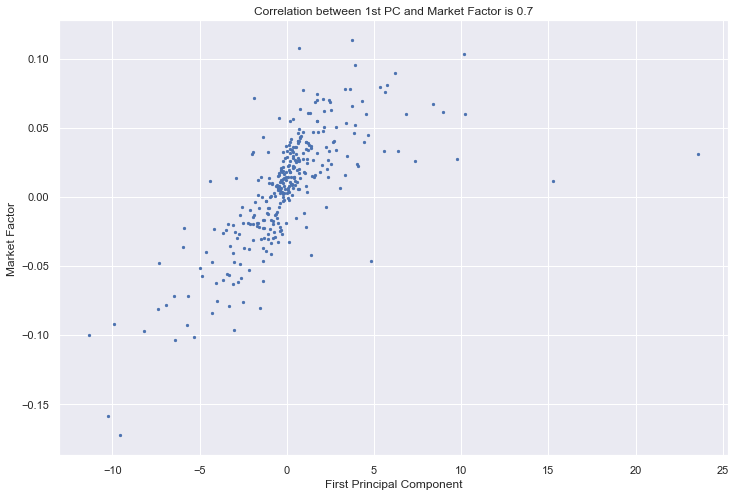

In [26]:
corr = round(factors['MKT'].corr(pc_ret_rt['PC 1']), 2)
plt.scatter(pc_ret_rt['PC 1'], factors['MKT'], s=5)
plt.xlabel('First Principal Component')
plt.ylabel('Market Factor')
plt.title(f'Correlation between 1st PC and Market Factor is {corr}');

In [27]:
standardized_factors = (factors - factors.mean(axis=0))/factors.std(axis=0)

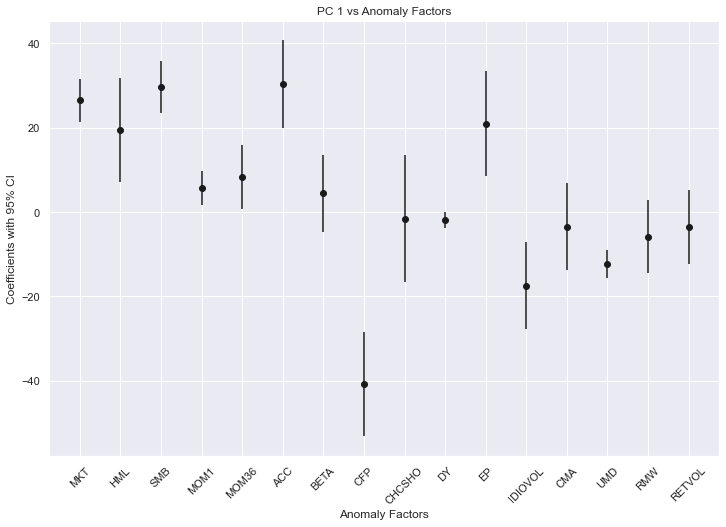

In [28]:
pc1 = OLS_regression(y = pc_ret_rt, X = factors, y_column = "PC 1", is_pc = False)

In [29]:
print(pc1.summary())

                            OLS Regression Results                            
Dep. Variable:                   PC 1   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     139.3
Date:                Fri, 07 Jul 2023   Prob (F-statistic):          1.04e-130
Time:                        18:39:12   Log-Likelihood:                -503.55
No. Observations:                 326   AIC:                             1041.
Df Residuals:                     309   BIC:                             1105.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1940      0.074     -2.629      0.0

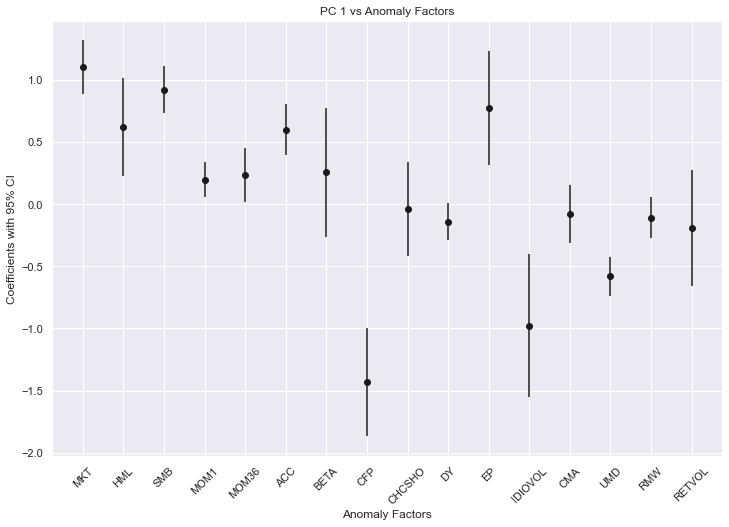

In [30]:
pc1std = OLS_regression(y = pc_ret_rt, X = standardized_factors, y_column = "PC 1", is_pc = False)

In [31]:
print(pc1std.summary())

                            OLS Regression Results                            
Dep. Variable:                   PC 1   R-squared:                       0.878
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     139.3
Date:                Fri, 07 Jul 2023   Prob (F-statistic):          1.04e-130
Time:                        18:39:13   Log-Likelihood:                -503.55
No. Observations:                 326   AIC:                             1041.
Df Residuals:                     309   BIC:                             1105.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.162e-16      0.065   -1.8e-15      1.0

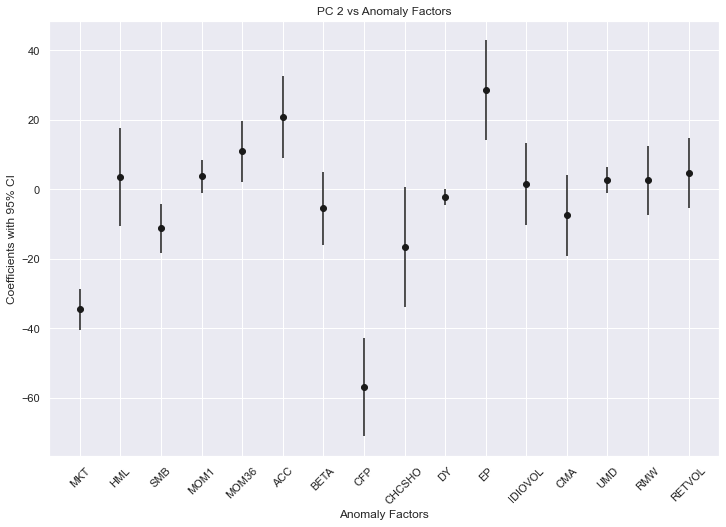

In [32]:
pc2 = OLS_regression(y = pc_ret_rt, X = factors, y_column = "PC 2", is_pc = False)

In [33]:
print(pc2.summary())

                            OLS Regression Results                            
Dep. Variable:                   PC 2   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     37.87
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           4.19e-63
Time:                        18:39:13   Log-Likelihood:                -549.10
No. Observations:                 326   AIC:                             1132.
Df Residuals:                     309   BIC:                             1197.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3155      0.085      3.718      0.0

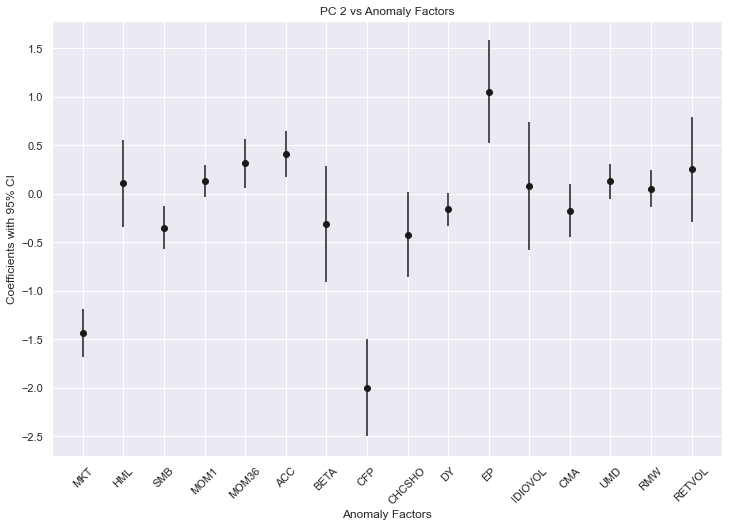

In [34]:
pc2std = OLS_regression(y = pc_ret_rt, X = standardized_factors, y_column = "PC 2", is_pc = False)

In [35]:
print(pc2std.summary())

                            OLS Regression Results                            
Dep. Variable:                   PC 2   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     37.87
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           4.19e-63
Time:                        18:39:13   Log-Likelihood:                -549.10
No. Observations:                 326   AIC:                             1132.
Df Residuals:                     309   BIC:                             1197.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.684e-17      0.074   6.31e-16      1.0

### (c) (30 points) 

Now, run a principal component analysis on the 16 "anomaly factors" and select the optimal number of principal components using the same criterion adopted in the first item of the exercise. By inspecting the principal eigenvectors can you identify a dominating "anomaly"?

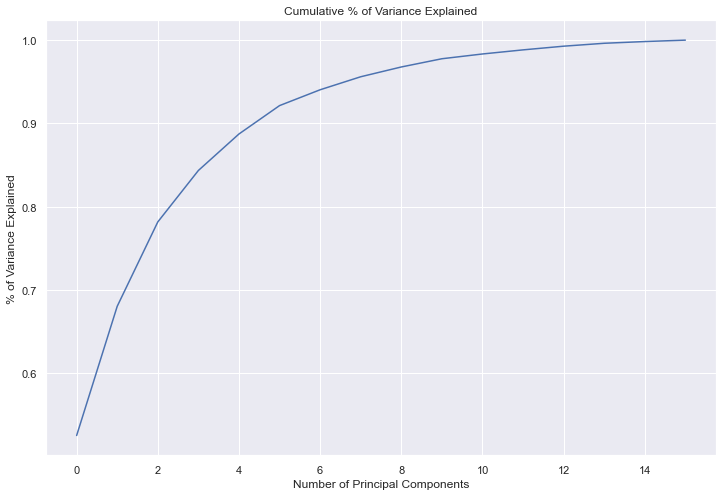

In [36]:
pcs, gammas, lambdas, alphas = PCA_function(factors)

The transformed dataset containing only the first $k$ PCs is the $(T \times k)$ matrix is given by
$$
\begin{aligned}
Z_{(k)}&:=\boldsymbol{X} \boldsymbol{\Gamma}_k \\
&:=\left(Z_1, \ldots, Z_k\right) .
\end{aligned}
$$

In [37]:
pcs

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10,PC 11,PC 12,PC 13,PC 14,PC 15,PC 16
dates,,,,,,,,,,,,,,,,
1991-11-29,-0.040773,-0.040907,-0.034789,-0.042608,0.021649,0.016281,-0.002945,0.013785,-0.017158,0.014302,-0.000852,-0.001911,0.020720,-0.006350,-0.001400,0.010884
1991-12-31,0.112512,-0.012316,-0.038009,0.025986,-0.097625,-0.067016,0.003296,0.040766,-0.007335,-0.038197,-0.019778,-0.016917,0.001232,-0.004424,0.009337,0.003344
1992-01-31,0.121870,0.061630,0.066577,0.094953,0.039049,0.094894,-0.019855,-0.018094,0.027580,-0.025830,-0.010560,0.016397,-0.015376,0.005044,-0.015541,0.000678
1992-02-28,-0.005106,0.043395,0.047053,0.084682,0.035254,-0.009129,0.001453,-0.009655,0.018775,-0.037510,-0.010383,0.011410,-0.015339,-0.020289,-0.007772,-0.006360
1992-03-31,-0.108007,0.012929,0.026053,0.021665,0.019578,0.005955,0.008637,-0.012087,-0.007382,0.001359,0.014567,-0.002389,0.000943,-0.014158,-0.008707,0.004097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-08-31,0.070953,-0.020014,-0.064739,-0.014552,-0.031384,0.001708,0.000216,0.006447,0.033096,-0.004760,0.005052,0.018721,-0.006200,0.004292,-0.008864,0.001477
2018-09-28,0.006513,-0.057196,0.004248,-0.013213,0.005573,-0.003490,0.028139,-0.015625,0.005807,-0.002020,0.011408,0.008313,0.012052,0.007154,0.008874,0.007852
2018-10-31,-0.167718,-0.033319,0.045695,-0.010240,0.027620,0.030816,0.020208,-0.008359,-0.036528,-0.013421,-0.003895,0.014628,0.007450,0.015891,0.009551,0.001811


Given the desired number of $\mathrm{PCs}$, say $1 \leq k \leq n$, we collect all the vectors $\gamma_1, \ldots \gamma_k$ in a $(n \times k)$ matrix
$$
\Gamma_k:=\left(\gamma_1, \ldots \gamma_k\right)
$$

In [38]:
gammas.shape

(16, 16)

Also, by construction, the columns of $Z_{(k)}$ (the PCs) are orthogonal random variables, and with sample variances $\lambda_1, \ldots, \lambda_k$.

Thus, the sample covariance matrix of $Z_{(k)}$ is given by the $(k \times k)$ diagonal matrix
$$
\boldsymbol{\Lambda}_k:=\operatorname{diag}\left(\lambda_1, \ldots, \lambda_k\right)
$$

In [39]:
lambdas[:10]

array([0.0143643 , 0.00424359, 0.00277031, 0.00168956, 0.00119888,
       0.00093209, 0.00052007, 0.00042722, 0.00032125, 0.00027015])

It is a good idea to start by running a full PCA $(k=n)$ and plotting the quantity
$$
\alpha_j=\frac{\lambda_j}{\sum_{j=1}^n \lambda_j} 
$$
for $j \in\{1, \ldots, n\}$.

In [40]:
alphas[:10]

array([0.52522946, 0.15516658, 0.10129623, 0.06177849, 0.04383691,
       0.03408185, 0.01901649, 0.01562144, 0.01174643, 0.00987803])

In [41]:
Lambda = round(pcs.cov(), 4)

Also, by construction, the columns of $Z_{(k)}$ (the $\mathrm{PCs}$) are orthogonal random variables, and with sample variances $\lambda_1, \ldots, \lambda_k$.
Thus, the sample covariance matrix of $Z_{(k)}$ is given by the $(k \times k)$ diagonal matrix
$$
\boldsymbol{\Lambda}_k:=\operatorname{diag}\left(\lambda_1, \ldots, \lambda_k\right) .
$$

In [42]:
Lambda.head(10)[['PC 1', 'PC 2', 'PC 3', 'PC 4', 'PC 5', 'PC 6', 'PC 7', 'PC 8', 'PC 9', 'PC 10']]

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6,PC 7,PC 8,PC 9,PC 10
PC 1,0.0144,0.0000,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0000,0.0000
PC 2,0.0000,0.0042,0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,-0.0000
PC 3,0.0000,0.0000,0.0028,-0.0000,0.0000,-0.0000,-0.0000,-0.0000,-0.0000,-0.0000
PC 4,0.0000,0.0000,-0.0000,0.0017,0.0000,0.0000,-0.0000,-0.0000,0.0000,0.0000
PC 5,-0.0000,-0.0000,0.0000,0.0000,0.0012,-0.0000,0.0000,-0.0000,-0.0000,-0.0000
PC 6,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0009,0.0000,0.0000,0.0000,0.0000
PC 7,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0005,0.0000,-0.0000,-0.0000
PC 8,0.0000,0.0000,-0.0000,-0.0000,-0.0000,0.0000,0.0000,0.0004,0.0000,0.0000
PC 9,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0003,0.0000
PC 10,0.0000,-0.0000,-0.0000,0.0000,-0.0000,0.0000,-0.0000,0.0000,0.0000,0.0003


In [43]:
lambdas[:10]

array([0.0143643 , 0.00424359, 0.00277031, 0.00168956, 0.00119888,
       0.00093209, 0.00052007, 0.00042722, 0.00032125, 0.00027015])

#### Rule of Thumb
Stop at a $k$ such that the $(k+1)$-th PC does not add much to the already explained variance (say $<3 \%$ ).

In [44]:
n_pc_rt = rule_thumb(alphas)

The first 6 PCs explain 92.14% of the returns variance.


#### Informal Way
Choose the number of components such that a large portion (say 90\%) of the variance is explained.

In [45]:
n_pc_iw = informal_way(alphas)

The first 5 PCs explain 88.73% of the returns variance.


#### Biggest Drop 

Onatski (2010) suggests looking for the biggest drop computing
$$
r:=\arg \max _{1 \leq j<n} \frac{\lambda_j}{\lambda_{j+1}} .
$$

In [46]:
n_pc_bd = biggest_drop(lambdas)

The first 1 PCs explain 52.52% of the returns variance.


In [47]:
# rule of thumb
pc_fac_rt = pcs.iloc[:,:n_pc_rt]
pc_fac_rt.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6
dates,,,,,,
1991-11-29,-0.040773,-0.040907,-0.034789,-0.042608,0.021649,0.016281
1991-12-31,0.112512,-0.012316,-0.038009,0.025986,-0.097625,-0.067016
1992-01-31,0.121870,0.061630,0.066577,0.094953,0.039049,0.094894
1992-02-28,-0.005106,0.043395,0.047053,0.084682,0.035254,-0.009129
1992-03-31,-0.108007,0.012929,0.026053,0.021665,0.019578,0.005955


Falta responder: by inspecting the principal eigenvectors can you identify a
dominating anomaly?

### (d) (30 points) 
How do the "anomaly-based principal factors" related to the "return-based principal factors"?

In [48]:
pc_ret_rt.head()

,PC 1,PC 2
dates,,
1991-11-29,-0.932311,0.655585
1991-12-31,0.684426,-0.766075
1992-01-31,2.223682,-0.458117
1992-02-28,0.562873,-0.140579
1992-03-31,-0.743650,0.306019


In [49]:
pc_fac_rt.head()

,PC 1,PC 2,PC 3,PC 4,PC 5,PC 6
dates,,,,,,
1991-11-29,-0.040773,-0.040907,-0.034789,-0.042608,0.021649,0.016281
1991-12-31,0.112512,-0.012316,-0.038009,0.025986,-0.097625,-0.067016
1992-01-31,0.121870,0.061630,0.066577,0.094953,0.039049,0.094894
1992-02-28,-0.005106,0.043395,0.047053,0.084682,0.035254,-0.009129
1992-03-31,-0.108007,0.012929,0.026053,0.021665,0.019578,0.005955


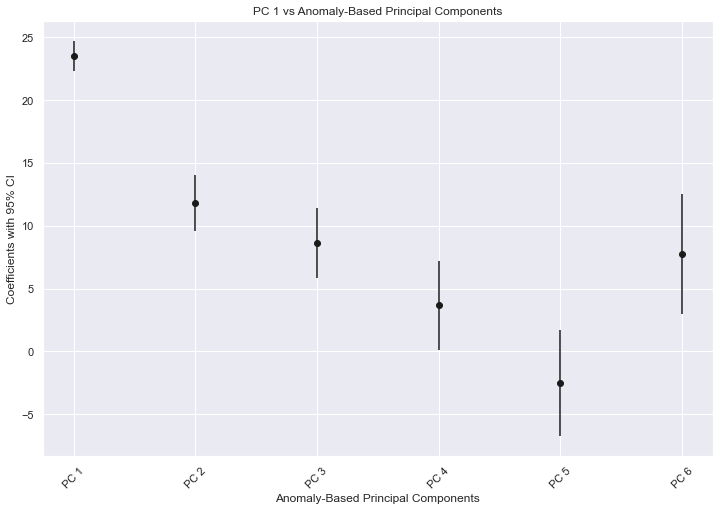

In [50]:
pc1 = OLS_regression(y = pc_ret_rt, X = pc_fac_rt, y_column = "PC 1", is_pc = True)

In [51]:
print(pc1.summary())

                            OLS Regression Results                            
Dep. Variable:                   PC 1   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     268.0
Date:                Fri, 07 Jul 2023   Prob (F-statistic):          2.33e-121
Time:                        18:39:14   Log-Likelihood:                -553.61
No. Observations:                 326   AIC:                             1121.
Df Residuals:                     319   BIC:                             1148.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.162e-16      0.074  -1.57e-15      1.0

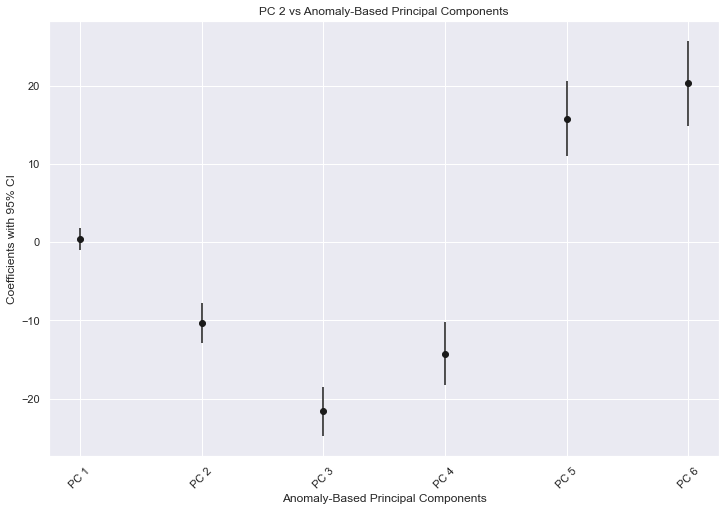

In [52]:
pc2 = OLS_regression(y = pc_ret_rt, X = pc_fac_rt, y_column = "PC 2", is_pc = True)

In [53]:
print(pc2.summary())

                            OLS Regression Results                            
Dep. Variable:                   PC 2   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.542
Method:                 Least Squares   F-statistic:                     65.07
Date:                Fri, 07 Jul 2023   Prob (F-statistic):           1.72e-52
Time:                        18:39:14   Log-Likelihood:                -595.75
No. Observations:                 326   AIC:                             1206.
Df Residuals:                     319   BIC:                             1232.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.684e-17      0.084   5.56e-16      1.0